## 0. Introduction

#### Loading Data and Modules

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [31]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


#### Purpose
The purpose of this project is to determine trends in voter data from 2016 to 2020 and use these trends to answer research questions about the data.

#### Goal
The goal of this project is to accurately visualize any trends in the data and be able to answer the research questions below.

#### Importance
This notebook organizes the data in the dataset to be more readable.  Additionally, people can utilize this project to visualize trends in the dataset that they wouldn't otherwise be able to gauge just from reading the github link.

#### Research Questions
* In which month is the number of new voters the highest for 2016 and 2020 for each state?
* For the state of DC, what proportion of the total voter population registered as new voters for 2016 versus 2020?

## 1. Data Processing



In [32]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The columns in the dataset are Jurisdiction, Year, Month, and New registered voters.  Each entry represents the number of new registered voters in a given month in an election year (2016 or 2020) for a specific state.

In [33]:
voters.isnull().values.any()

False

There are no missing data values in the dataset.

In [34]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


The "Jurisdiction" and "Month" columns contain objects, while the "Year" and "New registered voters" columns contain integers.

In [35]:
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               106 non-null    object
 1   Year               106 non-null    int64 
 2   Month              106 non-null    object
 3   registered_voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In this dataset, there is a limited number of states where data was collected for voter registration in 2016 and 2020.  Additionally, there is limited information for multiple states as some states include the months of May while others only have data for January through April.

###Exploratory Data Analysis

In [36]:
voters["registered_voters"].sort_values(ascending=False).head(1)

,registered_voters
13,238281


In [37]:
voters.loc[voters["registered_voters"]==238281]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was in February of 2020 in California with 238,281 new voters.

In [38]:
average_voters = voters["registered_voters"].mean()
average_voters

48223.46226415094

The average voter registration is 48,223 new voters.

In [39]:
high_voters = voters.loc[voters["registered_voters"]>average_voters]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [40]:
high_voters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


Voter registration was higher than the average 36 separate times for the voting years of 2016 and 2020.

In [41]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


The state in which the number of new voters went above average most frequently was Texas with 8 times.  The state that had the least frequency of above average voters was Georgia with a single time.  Calfornia and Florida both went above average 7 times, North Carolina 6 times, Illinois 4 times, and Arizona 3 times.

In [42]:
high_voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,159627.571429
Texas,134466.125000
Illinois,74252.250000


California, Texas, and Illinois had the highest average voter registration overall.

## 2. Data Visualization

In [43]:
total = voters.groupby("NAME")["registered_voters"].sum()
total = pd.DataFrame(total).reset_index()
total

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220
3,Delaware,25331
4,District of Columbia,32484
5,Florida,526945
6,Georgia,292833
7,Illinois,454723
8,Maryland,221335
9,North Carolina,560408


Just making the totals for each state in a separate dataframe and using pd.DataFrame from [w3schools](https://www.w3schools.com/python/pandas/pandas_dataframes.asp)

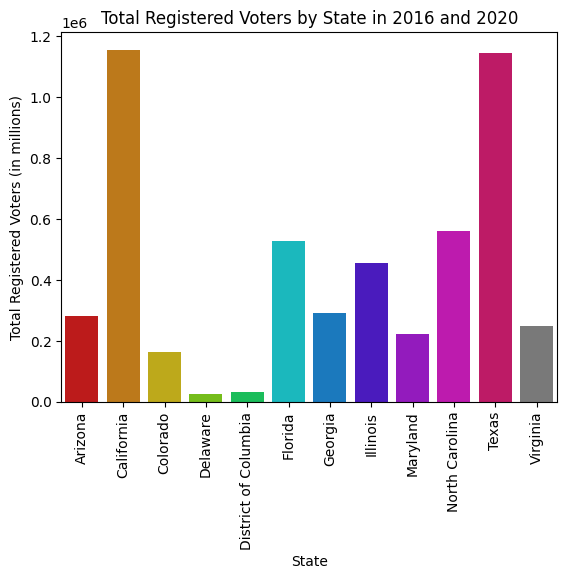

In [44]:
colors=["#d70000", "#d77e00", "#d8bd00", "#78d800", "#00d856", "#00d1d8",
        "#007ed8", "#3f00d8", "#a000d8", "#d800c4", "#d80064", "#797979"]
sns.barplot(total, x="NAME", y="registered_voters", palette=colors, hue="NAME")
plt.xlabel("State")
plt.ylabel("Total Registered Voters (in millions)")
plt.xticks(rotation=90)
plt.title("Total Registered Voters by State in 2016 and 2020")
plt.show()

The larger states (California and Texas) have the highest total number of new registered voters for 2016 and 2020, while the smaller states (Delaware, DC) have the lowest total number.  This makes sense as there is a larger population in California and Texas, therefore there would be relatively more new voters every election year.

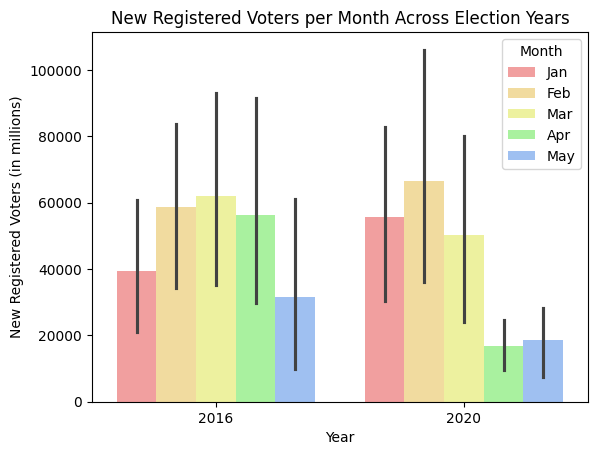

In [45]:
colors_2 = ["#ff9191", "#ffe291", "#f9ff91", "#9eff91", "#91bdff"]
sns.barplot(voters, x="Year", y="registered_voters", palette=colors_2, hue="Month")
plt.xlabel("Year")
plt.ylabel("New Registered Voters (in millions)")
plt.title("New Registered Voters per Month Across Election Years")
plt.show()

The new voter count per month in 2016 shows a bell curve distribution, with the most new voters registering in March.  However, in 2020, the most voter registration happened in February, with a drastic drop-off in the months of April and May.  This could also be due to some missing data from particular states during specific months (only going up to March or only going up to April).

The research question: For the state of DC, what percentage of the total voter population registered as new voters for 2016 versus 2020?

In [46]:
dc_data = voters.loc[voters["NAME"]=="District of Columbia"]
dc_data

,NAME,Year,Month,registered_voters
32,District of Columbia,2016,Jan,2840
33,District of Columbia,2016,Feb,2954
34,District of Columbia,2016,Mar,4706
35,District of Columbia,2016,Apr,4157
36,District of Columbia,2016,May,5714
37,District of Columbia,2020,Jan,3334
38,District of Columbia,2020,Feb,3348
39,District of Columbia,2020,Mar,2225
40,District of Columbia,2020,Apr,1281
41,District of Columbia,2020,May,1925


I created a separate dataframe, isolating only entries from DC.

In [47]:
dc_data.groupby("Year")["registered_voters"].sum()

,registered_voters
Year,
2016,20371
2020,12113


I grouped the data from my DC dataset by year and added up the total number of voters per year.

In [48]:
dc_data["total_voters"] = [20371, 20371, 20371, 20371, 20371, 12113, 12113, 12113, 12113, 12113]
dc_data

<ipython-input-48-eb042f3c9846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_data["total_voters"] = [20371, 20371, 20371, 20371, 20371, 12113, 12113, 12113, 12113, 12113]


,NAME,Year,Month,registered_voters,total_voters
32,District of Columbia,2016,Jan,2840,20371
33,District of Columbia,2016,Feb,2954,20371
34,District of Columbia,2016,Mar,4706,20371
35,District of Columbia,2016,Apr,4157,20371
36,District of Columbia,2016,May,5714,20371
37,District of Columbia,2020,Jan,3334,12113
38,District of Columbia,2020,Feb,3348,12113
39,District of Columbia,2020,Mar,2225,12113
40,District of Columbia,2020,Apr,1281,12113
41,District of Columbia,2020,May,1925,12113


In [49]:
dc_data["percentage"] = dc_data["registered_voters"]/dc_data["total_voters"] * 100
dc_data

<ipython-input-49-354a7e2a9e22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_data["percentage"] = dc_data["registered_voters"]/dc_data["total_voters"] * 100


,NAME,Year,Month,registered_voters,total_voters,percentage
32,District of Columbia,2016,Jan,2840,20371,13.941387
33,District of Columbia,2016,Feb,2954,20371,14.501006
34,District of Columbia,2016,Mar,4706,20371,23.101468
35,District of Columbia,2016,Apr,4157,20371,20.406460
36,District of Columbia,2016,May,5714,20371,28.049678
37,District of Columbia,2020,Jan,3334,12113,27.524148
38,District of Columbia,2020,Feb,3348,12113,27.639726
39,District of Columbia,2020,Mar,2225,12113,18.368695
40,District of Columbia,2020,Apr,1281,12113,10.575415
41,District of Columbia,2020,May,1925,12113,15.892017


I then created two columns to add to the dataset: total_voters and percentage.  I will use these in the visualization below.

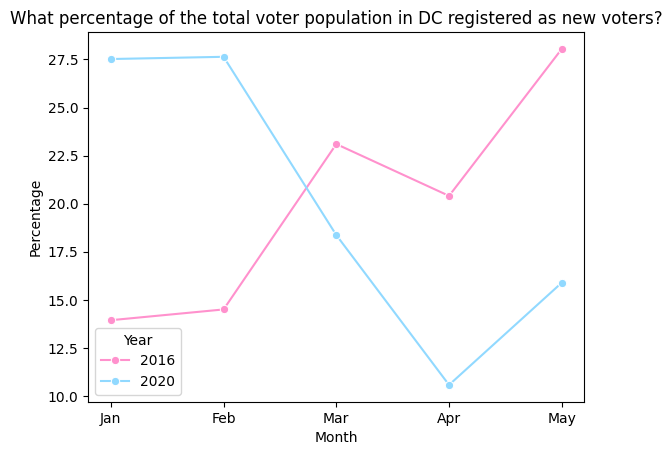

In [50]:
colors_3 = ["#ff91cd", "#91d9ff"]
sns.lineplot(x="Month", y="percentage", data=dc_data, hue="Year", palette=colors_3, marker = "o")
plt.ylabel("Percentage")
plt.title("What percentage of the total voter population in DC registered as new voters?")
plt.show()

Syntax of line plots taken from class notes and [geeksforgeeks](https://www.geeksforgeeks.org/line-plot-styles-in-matplotlib/)

In 2016, there was a general increase in the percentage of new voters to the total voters registered from January to May.  However, in 2020, the opposite happened, with the highest percentage being in January and the lowest being in April, with a general decrease in overall percentage through the year.

## 3. Mapping

In [51]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [52]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [53]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us_bbox = states.cx[minx:maxx, miny:maxy]

In [54]:
individual_avg = voters.groupby("NAME")["registered_voters"].mean().round()
individual_avg = pd.DataFrame(individual_avg).reset_index()
individual_avg

,NAME,registered_voters
0,Arizona,35312.0
1,California,144545.0
2,Colorado,20528.0
3,Delaware,3166.0
4,District of Columbia,3248.0
5,Florida,65868.0
6,Georgia,36604.0
7,Illinois,56840.0
8,Maryland,22134.0
9,North Carolina,56041.0


I created a dataframe averaging the number of voters grouped by the 12 different states in the dataset.

In [55]:
us_bbox.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   49 non-null     object  
 1   STATENS   49 non-null     object  
 2   AFFGEOID  49 non-null     object  
 3   GEOID     49 non-null     object  
 4   STUSPS    49 non-null     object  
 5   NAME      49 non-null     object  
 6   LSAD      49 non-null     object  
 7   ALAND     49 non-null     int64   
 8   AWATER    49 non-null     int64   
 9   geometry  49 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.2+ KB


In [56]:
individual_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NAME               12 non-null     object 
 1   registered_voters  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 324.0+ bytes


In [57]:
state_voters = us_bbox.merge(individual_avg, on="NAME", how="inner")
state_voters.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56041.0
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.0
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.0
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.0
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.0


I merged the two dataframes together using .merge().

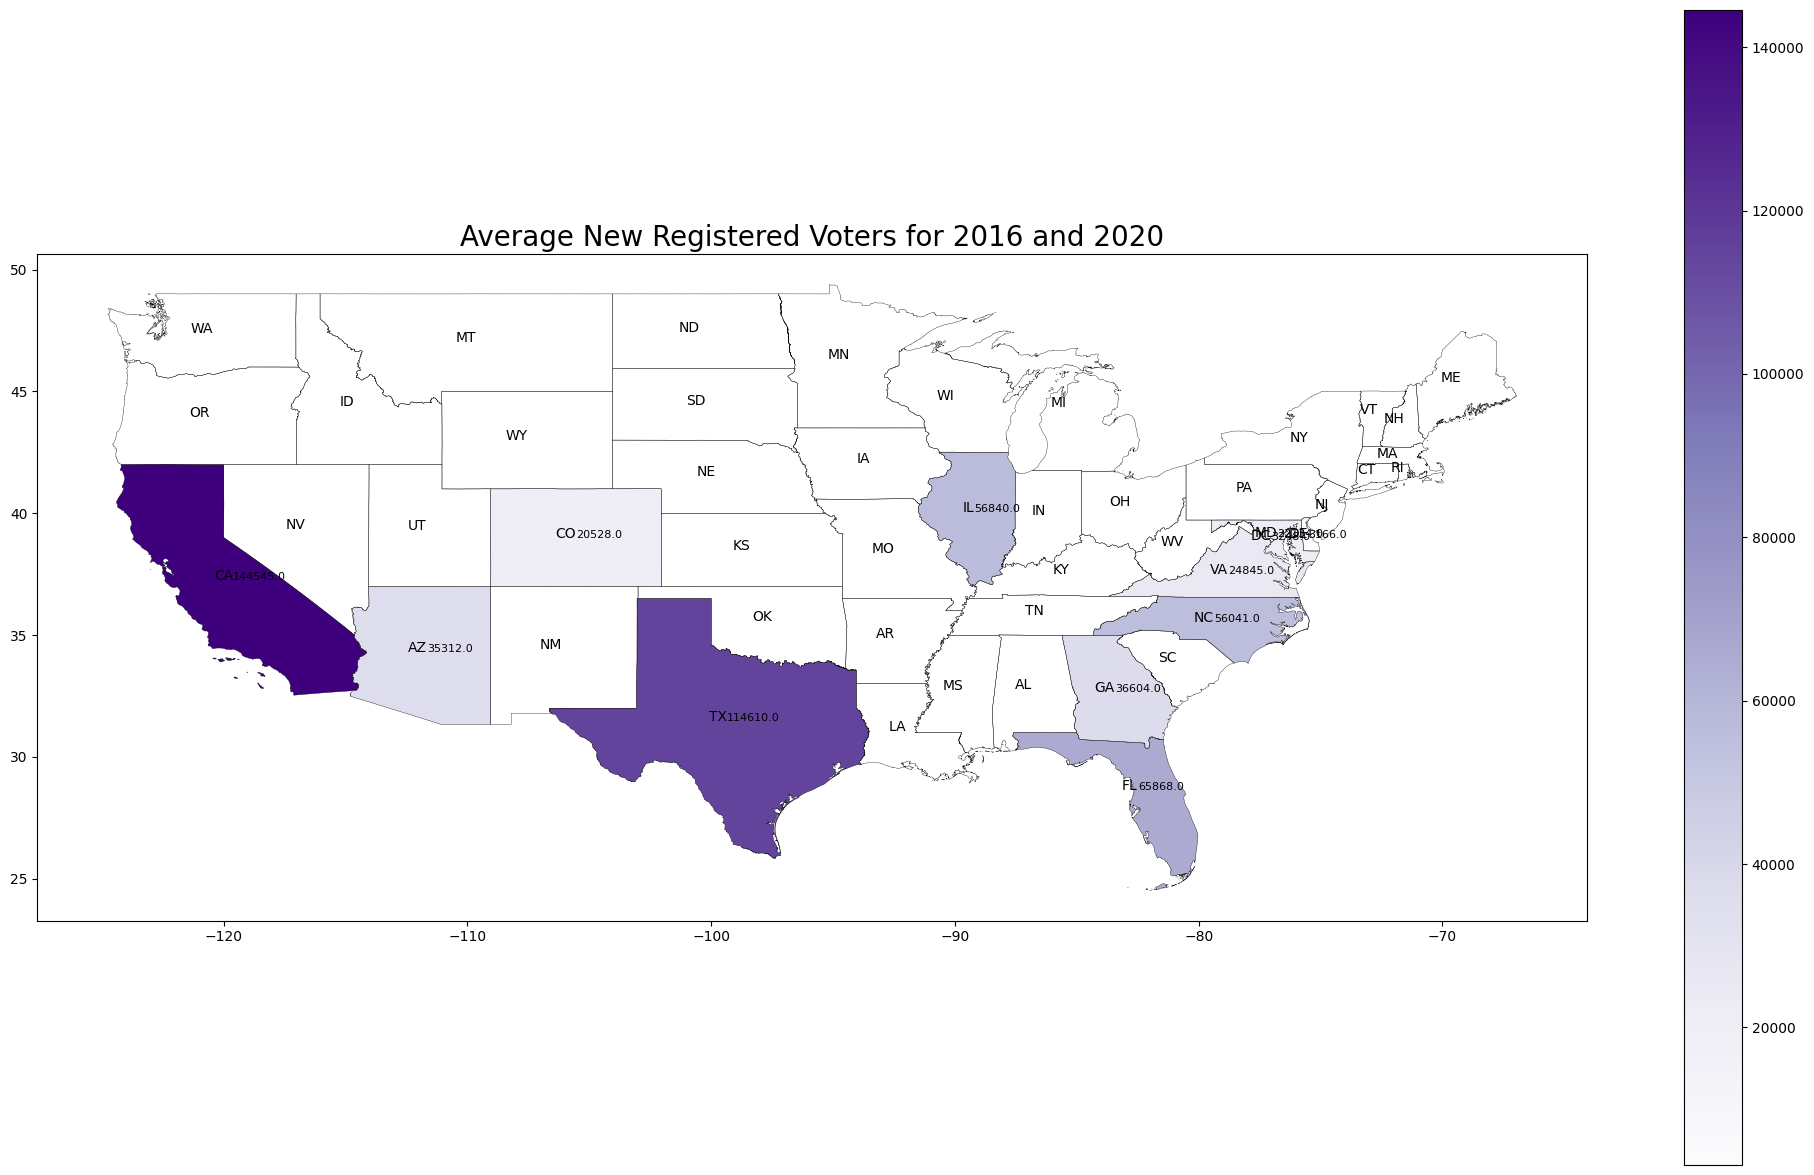

In [58]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
us_bbox.boundary.plot(ax=ax, color="black", linewidth=.25)
state_voters.plot(column="registered_voters", ax=ax, legend=True, cmap="Purples")
us_bbox.apply(lambda x: ax.annotate(text=x.STUSPS,
                  xy=(x.geometry.centroid.x, x.geometry.centroid.y), ha="right", fontsize=10), axis=1)
state_voters.apply(lambda x: ax.annotate(text=x.registered_voters,
                  xy=(x.geometry.centroid.x, x.geometry.centroid.y), ha="left", fontsize=8), axis=1)
plt.title("Average New Registered Voters for 2016 and 2020", fontsize=20)
plt.show()

## 4. Conclusion

### Insights
From this notebook, I found that there was a general increase of new registered voters in 2016, while there was a general decrease in 2020 throughout the first 4-5 months of registration.  I also found that the highest number of voters came from the states of California and Texas, while the smallest number of voters came from DC and Delaware.  Additionally, I found that the most new voters registered in the months of February and March.

### Suggestions
In order to maximize potential voter registration, you could campaign and spread information about how to register to vote in February and March.  You could also increase voter registration in other states by focusing your efforts on medium-sized states such as Colorado.  Additionally, since California and Texas showed the highest number of new voters registered, you could continue to give citizens in those states information about registering to vote, who the candidates are, and other helpful information that would incentivize them to maintain the historically-high numbers of voter registration.

### Possible Next Steps
If I were to continue working on this project, there are multiple avenues I would focus on.  One such avenue is to get any missing data from the states already represented in the dataset, since many states are missing voter registration data from the months of April and May.  This could have skewed the data and created inaccurate visual representations of the true numbers.  Furthermore, I would want to look into the voter registration numbers of other states, not just the 12 states represented in the data.

## 5. Github
https://github.com/catenGH/325-Midterm/blob/22619d5f03e70ce1e06c24df8fe6c8042fc69b9c/Cate's_Midterm_Project.ipynb

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Cate Nguyen